<a href="https://colab.research.google.com/github/AditiShanmugam/Multi-Modal-Machine-Learning/blob/main/RN50_FYP_Munchies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import subprocess
 
CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)
 
if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
  torch_version_suffix = "+cu110"

CUDA version: 11.1


In [2]:
!pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html
!pip install ftfy regex

import torch

print("Torch version:", torch.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.4 MB/s eta 0:03:58tcmalloc: large alloc 1147494400 bytes == 0x3a3c4000 @  0x7f2787e3e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████████████▏  | 1055.7 MB 1.2 MB/s eta 0:01:26tcmalloc: large alloc 1434370048 bytes == 0x7ea1a000 @  0x7f2787e3e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████

In [3]:
#Checking for GPU:
batch_size=50
from torch import cuda
train_on_gpu = cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')
if train_on_gpu:
    gpu_count = cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False

Train on gpu: True
1 gpus detected.


In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [6]:
# make directory to hold images
import os 

#if 'images' not in os.listdir():
#!mkdir /content/images/
# !rm -r /content/images/

# unzip and extract
# !cp -r /content/gdrive/MyDrive/Exotic_Food_Dataset/ExoticFood/ /content/images/
!unzip -uq '/content/gdrive/MyDrive/FinalYearProject-Group11/Datasets/Image_Database_Munchies.zip' -d "/content/images"

In [7]:
import os
!mkdir data/
!rm -rf data/
!rm -rf data/train
!rm -rf data/test
!rm -rf data/val
!mkdir data/
!mkdir data/train
!mkdir data/test
!mkdir data/val

In [8]:
import os
image_urls = []
labels = []

path = '/content/images/Image_Database_Munchies'


for folder in os.listdir(path):
  if folder != '.DS_Store':
    for file in os.listdir(os.path.join(path, folder)):
      if file != '.DS_Store':
        url = os.path.join(path, folder, file)
        image_urls.append(url)
        name = folder#.replace('_',' ')
        labels.append(name)


print(f'# of images: {len(image_urls)}')
print(f'# of labels: {len(labels)}')

# of images: 132
# of labels: 132


In [9]:
class_to_idx = {v:k for k,v in enumerate(sorted(set(labels)))}
idx_to_class = {k:v for v,k in class_to_idx.items()}

list_of_targets = [class_to_idx[label] for label in labels]

In [10]:
import pandas as pd
df = pd.DataFrame(list(zip(image_urls, labels, list_of_targets)), columns = ['image_urls', 'labels', 'targets'])

In [11]:
Names = sorted(set(labels))

In [12]:
n_classes = len(Names)
print('Number of classes:',n_classes)

Number of classes: 6


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, _, _ = train_test_split(df, df['labels'],stratify=df['labels'], test_size=0.3)
X_test, X_val, _, _ = train_test_split(X_test, X_test['labels'], stratify=X_test['labels'], test_size=0.5)

In [14]:
X_train['Type'] = 'train'
X_test['Type'] = 'test'
X_val['Type'] = 'val'
df = pd.concat([X_train,X_test, X_val])

In [15]:
df

,image_urls,labels,targets,Type
78,/content/images/Image_Database_Munchies/Ruffle...,Ruffles_Oven_Baked_Cheddar_&_Sour_Cream_Flavored,4,train
52,/content/images/Image_Database_Munchies/LAYS _...,LAYS _BBQ_Flavored_Potato_Chips,1,train
41,/content/images/Image_Database_Munchies/Thinny...,Thinny_Chips,5,train
23,/content/images/Image_Database_Munchies/Popchi...,Popchips_Barbeque,2,train
27,/content/images/Image_Database_Munchies/Popchi...,Popchips_Barbeque,2,train
...,...,...,...,...
110,/content/images/Image_Database_Munchies/Pringl...,Pringles_Original_Potato_Chips,3,val
28,/content/images/Image_Database_Munchies/Popchi...,Popchips_Barbeque,2,val
35,/content/images/Image_Database_Munchies/Thinny...,Thinny_Chips,5,val
63,/content/images/Image_Database_Munchies/LAYS _...,LAYS _BBQ_Flavored_Potato_Chips,1,val


In [16]:
for name in Names:
  os.system(f"mkdir data/train/'{name}'") 
  os.system(f"mkdir data/test/'{name}'")
  os.system(f"mkdir data/val/'{name}'")

In [17]:
from shutil import copyfile
for i,row in df.iterrows():
    section = row['Type']
    ipath = row['image_urls']
    #print(ipath, opath)
    opath = ipath.replace(f"images/Image_Database_Munchies/",f"data/{section}/")
    copyfile(ipath, opath)

In [95]:
traindir = '/content/data/train'
testdir = '/content/data/test'
valdir ='/content/data/val'

In [96]:
from torchvision import transforms
image_transforms = {
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=25),
        transforms.ColorJitter(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225]) 
    ]),

    'test':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
    
    'val':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [97]:
from torchvision import datasets
data = {
    'train':
    datasets.ImageFolder(root=traindir, transform=image_transforms['train']),
    'test':
    datasets.ImageFolder(root=testdir, transform=image_transforms['test']), 
    'val':
    datasets.ImageFolder(root=testdir, transform=image_transforms['val'])
} 

In [98]:
import matplotlib.pyplot as plt
import numpy as np
def imshow_tensor(image, ax=None, title=None):

    if ax is None:
        fig, ax = plt.subplots()

    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    plt.axis('off')

    return ax, image 

In [99]:
from torch.utils.data import DataLoader
data = {
    'train':
    datasets.ImageFolder(root=traindir, transform=image_transforms['train']),
    'test':
    datasets.ImageFolder(root=testdir, transform=image_transforms['test']),
    'val':
    datasets.ImageFolder(root=testdir, transform=image_transforms['val'])
}

dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True,num_workers=2),
    'test': DataLoader(data['test'], batch_size=batch_size, shuffle=True,num_workers=2),
    'val': DataLoader(data['val'], batch_size=batch_size, shuffle=True,num_workers=2)
} 

In [100]:
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape 

(torch.Size([50, 3, 224, 224]), torch.Size([50]))

In [101]:
#Function to train Model:
from timeit import default_timer as timer
def train(model,criterion,optimizer,train_loader, valid_loader, n_epochs=20, print_every=1):
  history = []

  for epoch in range(n_epochs):
    train_loss = 0.0
    train_acc = 0
    valid_loss = 0.0
    valid_acc = 0

    model.train()
    start = timer()

    for i, (data, target) in enumerate(train_loader):
      if train_on_gpu: 
        data, target = data.cuda(), target.cuda()
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output, target)
      loss.backward()
      optimizer.step()
      train_loss += loss.item() * data.size(0)
      _, pred = torch.max(output, dim=1)
      correct_tensor = pred.eq(target.data.view_as(pred))
      accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
      train_acc += accuracy.item() * data.size(0)
    
    else:
      with torch.no_grad():
        model.eval()
        for data, target in valid_loader:
          if train_on_gpu:
            data, target = data.cuda(), target.cuda()
          output = model(data)
          loss = criterion(output, target)
          valid_loss += loss.item()*data.size(0)
          _, pred = torch.max(output, dim=1)
          correct_tensor = pred.eq(target.data.view_as(pred))
          accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
          valid_acc += accuracy.item()*data.size(0)

  train_loss = train_loss / len(train_loader.dataset)
  train_acc = train_acc / len(train_loader.dataset)
  valid_loss = valid_loss / len(valid_loader.dataset)
  valid_acc = valid_acc / len(valid_loader.dataset)
  history.append([train_loss, train_acc, valid_loss, valid_acc])

  model.optimizer = optimizer
  total_time = timer() 
  history = pd.DataFrame(history,columns=['Train_loss', 'Train_acc', 'Val_loss', 'Val_ac'])

  return model, history

In [102]:
#Function to process an Image path into a Tensor:
from PIL import Image
def process_image(image_path):

    image = Image.open(image_path)
    img = image.resize((256, 256))

    width = 256
    height = 256
    new_width = 224
    new_height = 224

    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    img = img.crop((left, top, right, bottom))
    img = np.array(img).transpose((2, 0, 1)) / 256
    means = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    stds = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))

    img = img - means
    img = img / stds

    img_tensor = torch.Tensor(img)

    return img_tensor

In [103]:
#Function to make predictions on a single image:
def predict(image_path, model, topk=3):
    real_class = image_path.split('/')[-2]

    img_tensor = process_image(image_path)

    if train_on_gpu:
        img_tensor = img_tensor.view(1, 3, 224, 224).cuda()
    else:
        img_tensor = img_tensor.view(1, 3, 224, 224)

    with torch.no_grad():
        model.eval()
        out = model(img_tensor)
        ps = torch.exp(out)

        #Top 3 predictions
        topk, topclass = ps.topk(topk, dim=1)
        top_classes = [
            model.idx_to_class[class_] for class_ in topclass.cpu().numpy()[0]
        ]
        top_p = topk.cpu().numpy()[0]

        return img_tensor.cpu().squeeze(), top_p, top_classes, real_class

In [104]:
#Function to display Image and Predictions:
def display_prediction(image_path, model, topk):
    img, ps, classes, y_obs = predict(image_path, model, topk)
    result = pd.DataFrame({'p': ps}, index=classes)
    plt.figure(figsize=(16, 5))
    ax = plt.subplot(1, 2, 1)
    ax, img = imshow_tensor(img, ax=ax)
    ax.set_title(y_obs, size=20)

    ax = plt.subplot(1, 2, 2)
    #Bar plot
    result.sort_values('p')['p'].plot.barh(color='#2e4d7d', edgecolor='k', ax=ax)
    plt.xlabel('Predicted Probability')
    plt.tight_layout()

In [105]:
def accuracy(output, target, topk=(1, )):
    if train_on_gpu:
        output = output.to('cuda')
        target = target.to('cuda')

    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)
        _, pred = output.topk(k=maxk, dim=1, largest=True, sorted=True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size).item())
        return res

In [106]:
def evaluate(model, test_loader, criterion, topk=(1, 2, 3)):
    confusion_matrix = torch.zeros(n_classes, n_classes)
    classes = []
    losses = []
    acc_results = np.zeros((len(test_loader.dataset), len(topk)))
    i = 0

    model.eval()
    with torch.no_grad():
        for data, targets in test_loader:
            if train_on_gpu:
                data, targets = data.to('cuda'), targets.to('cuda')

            out = model(data)
            _, predscm = torch.max(out, 1)
            for t, p in zip(targets.view(-1), predscm.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
          
            for pred, true in zip(out, targets):
                acc_results[i, :] = accuracy(
                    pred.unsqueeze(0), true.unsqueeze(0), topk)
                classes.append(model.idx_to_class[true.item()])
                loss = criterion(pred.view(1, n_classes), true.view(1))
                losses.append(loss.item())
                i += 1

    results = pd.DataFrame(acc_results, columns=[f'top{i}' for i in topk])
    results['class'] = classes
    results['loss'] = losses
    results = results.groupby(classes).mean()

    return results.reset_index().rename(columns={'index': 'class'}),confusion_matrix

criterion = nn.NLLLoss()

In [107]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

#Pretrained ResNet50

In [108]:
#Model:
from torchvision import models
model = models.resnet50(pretrained=True)

In [109]:
for param in model.parameters():
    param.requires_grad = False 

In [110]:
import torch.nn as nn
n_inputs = model.fc.in_features
model.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256),
                      nn.ReLU(),
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),
                      nn.LogSoftmax(dim=1))

In [111]:
model.fc

Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=6, bias=True)
  (4): LogSoftmax(dim=1)
)

In [112]:
model = model.to('cuda') 

In [113]:
model.class_to_idx = data['train'].class_to_idx
model.idx_to_class = {
    idx: class_
    for class_, idx in model.class_to_idx.items()
}

list(model.idx_to_class.items())[:10] 

[(0, 'Krinkle_Cut_Truffle_And_Sea_Salt_Kettle_Chips'),
 (1, 'LAYS _BBQ_Flavored_Potato_Chips'),
 (2, 'Popchips_Barbeque'),
 (3, 'Pringles_Original_Potato_Chips'),
 (4, 'Ruffles_Oven_Baked_Cheddar_&_Sour_Cream_Flavored'),
 (5, 'Thinny_Chips')]

In [114]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
for p in optimizer.param_groups[0]['params']:
    if p.requires_grad:
        print(p.shape) 

torch.Size([256, 2048])
torch.Size([256])
torch.Size([6, 256])
torch.Size([6])


In [115]:
model, history = train(model, criterion, optimizer, dataloaders['train'], dataloaders['val'], n_epochs=10)
history

,Train_loss,Train_acc,Val_loss,Val_ac
0,0.211089,0.956522,0.369256,0.8


In [116]:
img_path = '/content/data/test/Popchips_Barbeque/Popchips_Barbeque0.jpg'
img, top_p, top_classes, real_class = predict(img_path, model,topk=3)

In [117]:
top_p, top_classes

(array([0.92045695, 0.03267235, 0.01410444], dtype=float32),
 ['Popchips_Barbeque',
  'Ruffles_Oven_Baked_Cheddar_&_Sour_Cream_Flavored',
  'Thinny_Chips'])

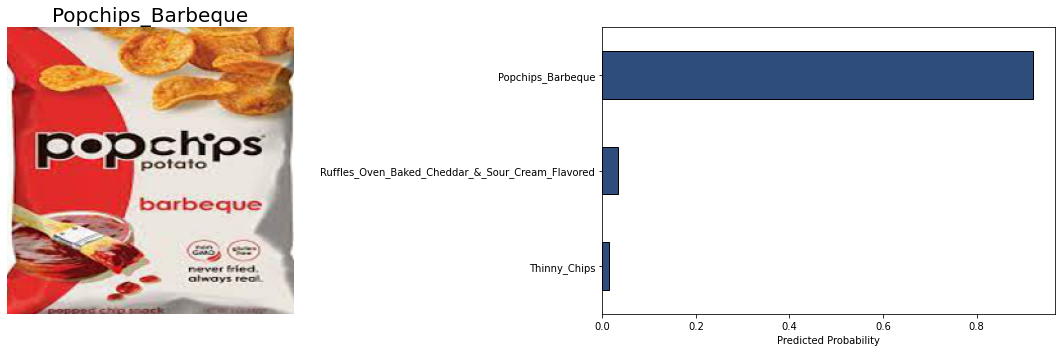

In [118]:
display_prediction(img_path, model, topk=3)

In [119]:
results, confusion_matrix = evaluate(model, dataloaders['test'], criterion)

Confusion matrix, without normalization


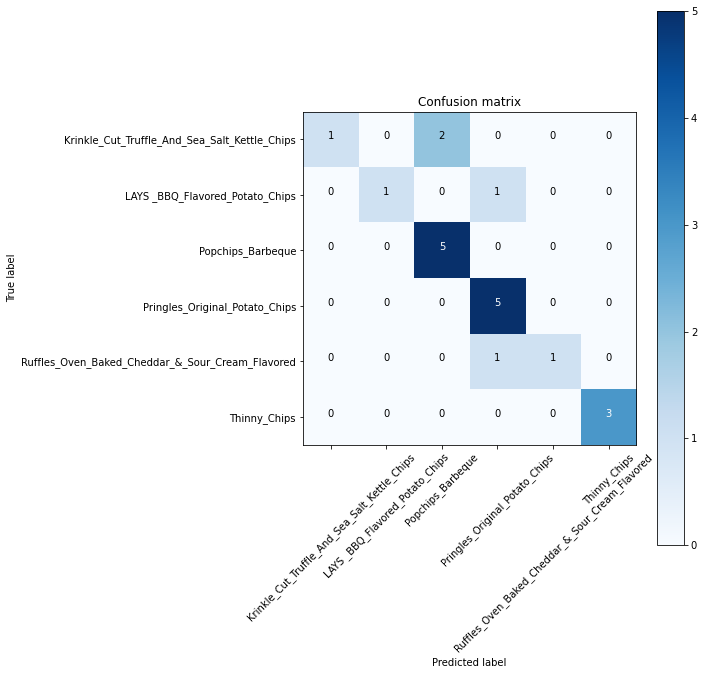

In [120]:
classnames = [model.idx_to_class[i] for i in range(0,n_classes)]
plt.figure(figsize=(10,10))
plt = plot_confusion_matrix(confusion_matrix, classnames)

In [121]:
print(f"Overall Accuracy:{(confusion_matrix.diag().sum()/confusion_matrix.sum())*100}%")

Overall Accuracy:80.0%


#Training a ResNet50 from Scratch

In [122]:
#Model:
from torchvision import models
model2 = models.resnet50(pretrained=False)

In [123]:
for param in model.parameters():
    param.requires_grad = True 

In [124]:
import torch.nn as nn
n_inputs = model2.fc.in_features
model2.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256),
                      nn.ReLU(),
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),
                      nn.LogSoftmax(dim=1))

In [125]:
model2 = model2.to('cuda') 

In [126]:
model2.class_to_idx = data['train'].class_to_idx
model2.idx_to_class = {
    idx: class_
    for class_, idx in model2.class_to_idx.items()
}

list(model2.idx_to_class.items())[:10] 

[(0, 'Krinkle_Cut_Truffle_And_Sea_Salt_Kettle_Chips'),
 (1, 'LAYS _BBQ_Flavored_Potato_Chips'),
 (2, 'Popchips_Barbeque'),
 (3, 'Pringles_Original_Potato_Chips'),
 (4, 'Ruffles_Oven_Baked_Cheddar_&_Sour_Cream_Flavored'),
 (5, 'Thinny_Chips')]

In [127]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
for p in optimizer.param_groups[0]['params']:
    if p.requires_grad:
        print(p.shape) 

torch.Size([64, 3, 7, 7])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([64, 256, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([64, 256, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([256, 64, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([128, 256, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([512, 128, 1, 1])
torch.Size([512])
torch.Size([512])
torch.Size([512, 256, 1, 1])
torch.Size([512])
torch.Size([512])
torch.Size([128, 512, 1, 1])
torch.Size([128])
torch.Siz

In [128]:
model2, history = train(model2, criterion, optimizer, dataloaders['train'], dataloaders['val'], n_epochs=10)
history

,Train_loss,Train_acc,Val_loss,Val_ac
0,1.817311,0.152174,1.80858,0.15


In [129]:
img_path = '/content/data/test/Popchips_Barbeque/Popchips_Barbeque0.jpg'
img, top_p, top_classes, real_class = predict(img_path, model2,topk=3)

In [130]:
top_p, top_classes

(array([0.18379512, 0.1823402 , 0.16148137], dtype=float32),
 ['Ruffles_Oven_Baked_Cheddar_&_Sour_Cream_Flavored',
  'Krinkle_Cut_Truffle_And_Sea_Salt_Kettle_Chips',
  'Thinny_Chips'])

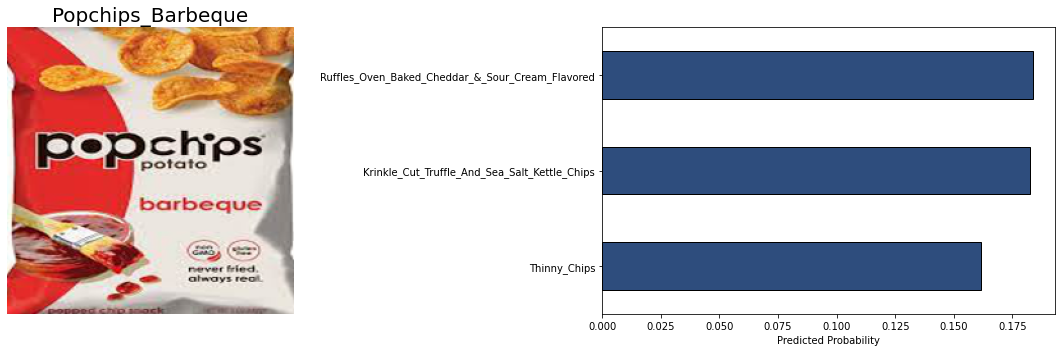

In [131]:
display_prediction(img_path, model2, topk=3)

In [132]:
results, confusion_matrix = evaluate(model2, dataloaders['test'], criterion)

Confusion matrix, without normalization


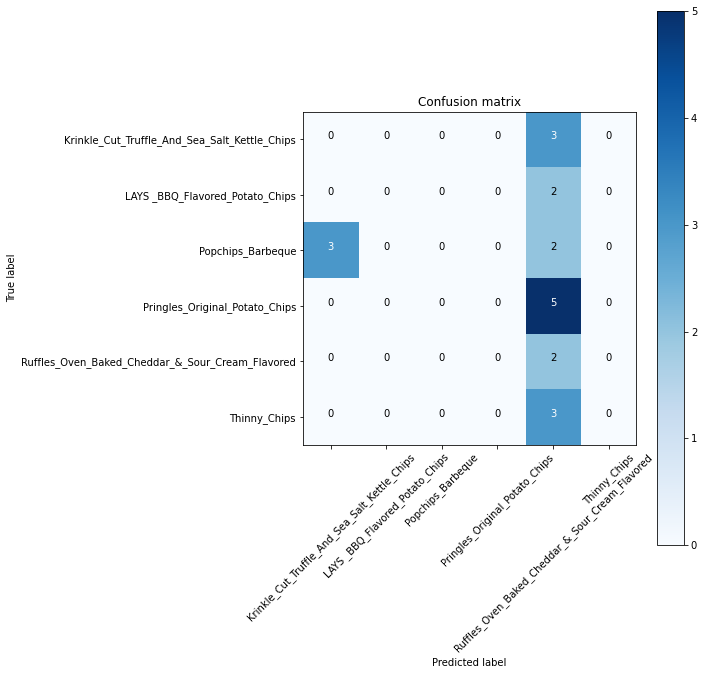

In [133]:
classnames = [model2.idx_to_class[i] for i in range(0,n_classes)]
plt.figure(figsize=(10,10))
plt = plot_confusion_matrix(confusion_matrix, classnames)

In [134]:
print(f"Overall Accuracy:{(confusion_matrix.diag().sum()/confusion_matrix.sum())*100}%")

Overall Accuracy:10.0%
